# Análisis Exploratorio de las primeras 16 variables del conjunto de datos

In [ ]:
!pip install pyreadstat

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyreadstat
from IPython.core.display import display, HTML
import json
import os

C:\Users\henry\AppData\Local\Temp\ipykernel_1676\4185279996.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
data_path = 'C:/Users/henry/Documents/jbook/Cacervix/cacervix/datos/'
data = pd.read_excel(data_path + 'CACU1985A2019v2.xls')


In [5]:
display(HTML(data.head().to_html()))

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,gru_ed1,gru_ed2,NIVEL_EDU,MUERTEPORO,SIMUERTEPO,OCUPACION,IDPERTET,CODPRES,CODPTORE,CODMUNRE,AREA_RES,SEG_SOCIAL,IDADMISALU,IDCLASADMI,pman_muer,CONS_EXP,CODOCUR,CODMUNOC,c_muerte,ASIS_MED,CAUSA_MULT,C_DIR1,C_DIR12,C_ANT1,C_ANT12,C_ANT2,C_ANT22,C_ANT3,C_ANT32,C_PAT1,C_PAT2,C_BAS1,C_MCM1,IDPROFCER,CAUSA_666_667,CAU_HOMOL,QUINQ,EDAD2
0,11,1,1,2,,,1996,11,2,1,10,10,9,,,,,,11,001,,,,,,2,,,,,,,,,,,,,,,,1809,,,,25,95A99,0A4
1,76,1,1,2,,,2007,01,2,1,10,10,2,,,,,170,76,001,1,3,,,1,2,,,4,1,,J969,,C539,,,,,,,,C539,,,209,25,05A09,5a9
2,8,1,1,1,,,1998,04,2,3,10,10,2,,,,,170,8,001,1,1,,,1,1,,,2,1,,J969,,C780,,C539,,,,,,C539,,,209,25,95A99,10a14
3,15,1,1,1,1500100021,H SAN RAFAEL DE TUNJA,2005,04,2,1,10,10,9,,,,,170,15,001,3,2,,,1,1,,,2,1,,J969,,T093,,C539,,,,,,C539,,,209,25,05A09,10a14
4,76,1,1,1,760010379901,E.S.E. HOSPITAL UNIVERSITARIO DEL V,2006,09,2,1,10,10,1,,,,,170,76,001,1,2,,,1,2,,,2,1,,I469,,J969,,C539,,,,G959,,C539,,,209,25,05A09,10a14


In [6]:
data.shape

(51448, 48)

In [7]:
data16 = data.iloc[:, :16]
data16.head()


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,gru_ed1,gru_ed2,NIVEL_EDU,MUERTEPORO,SIMUERTEPO,OCUPACION
0,11,1,1,2,,,1996,11,2,1,10,10,9,,,
1,76,1,1,2,,,2007,01,2,1,10,10,2,,,
2,8,1,1,1,,,1998,04,2,3,10,10,2,,,
3,15,1,1,1,1500100021,H SAN RAFAEL DE TUNJA,2005,04,2,1,10,10,9,,,
4,76,1,1,1,760010379901,E.S.E. HOSPITAL UNIVERSITARIO DEL V,2006,09,2,1,10,10,1,,,


In [8]:
for col in data16.columns:
    print(f'El tipo es: {data16[col].dtype} y el nombre es: {col}')

El tipo es: int64 y el nombre es: COD_DPTO
El tipo es: int64 y el nombre es: COD_MUNIC
El tipo es: int64 y el nombre es: A_DEFUN
El tipo es: int64 y el nombre es: SIT_DEFUN
El tipo es: object y el nombre es: COD_INST
El tipo es: object y el nombre es: NOM_INST
El tipo es: int64 y el nombre es: ANO
El tipo es: object y el nombre es: MES
El tipo es: int64 y el nombre es: SEXO
El tipo es: int64 y el nombre es: EST_CIVIL
El tipo es: int64 y el nombre es: gru_ed1
El tipo es: object y el nombre es: gru_ed2
El tipo es: int64 y el nombre es: NIVEL_EDU
El tipo es: object y el nombre es: MUERTEPORO
El tipo es: object y el nombre es: SIMUERTEPO
El tipo es: object y el nombre es: OCUPACION


In [9]:
data16.shape

(51448, 16)

## Explicación de variables

- **COD_DPTO**:	Departamento donde ocurrió la defunción
- **COD_MUNIC**:	Municipio donde ocurrió la defunción
- **A_DEFUN**:	Área donde ocurrió la defunción
- **SIT_DEFUN**:	Sitio de la defuncion
- **COD_INST**:	Código de la institución prestadora de salud
- **NOM_INST**:	Nombre de la institución de salud
- **ANO**:	Año en que ocurrió la defunción
- **MES**:	Mes en que ocurrió la defunción
- **SEXO**:	Sexo del fallecido
- **EST_CIVIL**:	Estado conyugal del fallecido
- **gru_ed1**:	Agrupación de edades, según la edad del fallecido
- **gru_ed2**: 	Agrupación de edades, según la edad del fallecido
- **NIVEL_EDU**: 	Nivel educativo del fallecido
- **MUERTEPORO**:	La ocupación pudo ser causa o estar asociada con la defunción
- **SIMUERTEPO**:	Accidente de trabajo o enfermedad profesional
- **OCUPACION**: 	¿Cúal fue la última ocupación habitual del fallecido?



In [10]:
print(data16.columns.tolist())

['COD_DPTO', 'COD_MUNIC', 'A_DEFUN', 'SIT_DEFUN', 'COD_INST', 'NOM_INST', 'ANO', 'MES', 'SEXO', 'EST_CIVIL', 'gru_ed1', 'gru_ed2', 'NIVEL_EDU', 'MUERTEPORO', 'SIMUERTEPO', 'OCUPACION']


## Análisis por departamento y municipio

Divición poblacional

In [11]:
print(data16['COD_DPTO'].unique())

[11 76  8 15 52 68 17 63  5 41 13 86 25 66 23 70 18 47 54 20 27 19 73 44
 50 85 95 88 81 91 99 94 97]


Asiganr nombres según código

In [12]:
map_dpto = {
    '5': 'ANTIOQUIA',
    '8': 'ATLÁNTICO',
    '11': 'BOGOTÁ, D.C.',
    '13': 'BOLÍVAR',
    '15': 'BOYACÁ',
    '17': 'CALDAS',
    '18': 'CAQUETÁ',
    '19': 'CAUCA',
    '20': 'CESAR',
    '23': 'CÓRDOBA',
    '25': 'CUNDINAMARCA',
    '27': 'CHOCÓ',
    '41': 'HUILA',
    '44': 'LA GUAJIRA',
    '47': 'MAGDALENA',
    '50': 'META',
    '52': 'NARIÑO',
    '54': 'NORTE DE SANTANDER',
    '63': 'QUINDÍO',
    '66': 'RISARALDA',
    '68': 'SANTANDER',
    '70': 'SUCRE',
    '73': 'TOLIMA',
    '76': 'VALLE DEL CAUCA',
    '81': 'ARAUCA',
    '85': 'CASANARE',
    '86': 'PUTUMAYO',
    '88': 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
    '91': 'AMAZONAS',
    '94': 'GUAINÍA',
    '95': 'GUAVIARE',
    '97': 'VAUPÉS',
    '99': 'VICHADA'
}
print('Los departamentos son: \n', map_dpto)

Los departamentos son: 
 {'5': 'ANTIOQUIA', '8': 'ATLÁNTICO', '11': 'BOGOTÁ, D.C.', '13': 'BOLÍVAR', '15': 'BOYACÁ', '17': 'CALDAS', '18': 'CAQUETÁ', '19': 'CAUCA', '20': 'CESAR', '23': 'CÓRDOBA', '25': 'CUNDINAMARCA', '27': 'CHOCÓ', '41': 'HUILA', '44': 'LA GUAJIRA', '47': 'MAGDALENA', '50': 'META', '52': 'NARIÑO', '54': 'NORTE DE SANTANDER', '63': 'QUINDÍO', '66': 'RISARALDA', '68': 'SANTANDER', '70': 'SUCRE', '73': 'TOLIMA', '76': 'VALLE DEL CAUCA', '81': 'ARAUCA', '85': 'CASANARE', '86': 'PUTUMAYO', '88': 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', '91': 'AMAZONAS', '94': 'GUAINÍA', '95': 'GUAVIARE', '97': 'VAUPÉS', '99': 'VICHADA'}


In [13]:
tipo= data16['COD_DPTO'].dtype
print('El tipo de datos es: ', tipo)
if data16['COD_DPTO'].dtype == 'int64':
    data16['COD_DPTO'] = data16['COD_DPTO'].astype(str)
    print(f'Y dado que era {tipo} , se convirtió a string')
    data16['DEPARTAMENTO'] = data16['COD_DPTO'].map(map_dpto)
    print(data16['DEPARTAMENTO'].unique())
else:
    data16['DEPARTAMENTO'] = data16['COD_DPTO'].map(map_dpto)
    print(data16['DEPARTAMENTO'].unique())

El tipo de datos es:  int64
Y dado que era int64 , se convirtió a string
['BOGOTÁ, D.C.' 'VALLE DEL CAUCA' 'ATLÁNTICO' 'BOYACÁ' 'NARIÑO'
 'SANTANDER' 'CALDAS' 'QUINDÍO' 'ANTIOQUIA' 'HUILA' 'BOLÍVAR' 'PUTUMAYO'
 'CUNDINAMARCA' 'RISARALDA' 'CÓRDOBA' 'SUCRE' 'CAQUETÁ' 'MAGDALENA'
 'NORTE DE SANTANDER' 'CESAR' 'CHOCÓ' 'CAUCA' 'TOLIMA' 'LA GUAJIRA' 'META'
 'CASANARE' 'GUAVIARE'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'ARAUCA'
 'AMAZONAS' 'VICHADA' 'GUAINÍA' 'VAUPÉS']


In [14]:
print('Número de departamentos y/o ciudades:', len(data16['DEPARTAMENTO'].unique()))

Número de departamentos y/o ciudades: 33


Reorganizar columnas

In [15]:
columnas = ['COD_DPTO', 'DEPARTAMENTO'] + [col for col in data16.columns if col not in ['COD_DPTO', 'DEPARTAMENTO']]
data16 = data16[columnas]
display(HTML(data16.head(10).to_html()))

,COD_DPTO,DEPARTAMENTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,gru_ed1,gru_ed2,NIVEL_EDU,MUERTEPORO,SIMUERTEPO,OCUPACION
0,11,"BOGOTÁ, D.C.",1,1,2,,,1996,11,2,1,10,10,9,,,
1,76,VALLE DEL CAUCA,1,1,2,,,2007,01,2,1,10,10,2,,,
2,8,ATLÁNTICO,1,1,1,,,1998,04,2,3,10,10,2,,,
3,15,BOYACÁ,1,1,1,1500100021,H SAN RAFAEL DE TUNJA,2005,04,2,1,10,10,9,,,
4,76,VALLE DEL CAUCA,1,1,1,760010379901,E.S.E. HOSPITAL UNIVERSITARIO DEL V,2006,09,2,1,10,10,1,,,
5,52,NARIÑO,287,1,2,,,2008,10,2,1,10,10,2,2,,
6,52,NARIÑO,1,1,2,,,1985,11,2,2,10,10,9,,,
7,68,SANTANDER,368,1,2,,,1986,05,2,2,10,10,9,,,
8,76,VALLE DEL CAUCA,111,1,2,,,1989,09,2,2,10,10,9,,,
9,17,CALDAS,42,1,2,,,1990,08,2,1,10,10,9,,,


Codificar municipios

In [16]:
print(data16['COD_MUNIC'].tolist())

[1, 1, 1, 1, 1, 287, 1, 368, 111, 42, 401, 887, 20, 1, 244, 1, 1, 1, 385, 1, 1, 88, 1, 290, 1, 276, 834, 1, 88, 466, 594, 1, 1, 1, 1, 579, 1, 1, 753, 326, 1, 302, 456, 1, 1, 1, 1, 1, 1, 470, 1, 109, 1, 1, 1, 42, 575, 45, 1, 1, 1, 1, 1, 1, 1, 172, 1, 1, 834, 130, 1, 1, 168, 250, 698, 1, 1, 736, 307, 1, 1, 1, 1, 520, 895, 1, 380, 170, 1, 443, 109, 1, 524, 11, 1, 1, 174, 45, 147, 579, 1, 873, 1, 248, 10, 790, 1, 1, 1, 1, 670, 520, 1, 1, 759, 1, 1, 81, 168, 834, 1, 1, 1, 1, 1, 555, 720, 1, 480, 88, 282, 172, 1, 1, 1, 1, 1, 1, 1, 799, 190, 1, 837, 1, 1, 51, 1, 520, 520, 1, 1, 1, 40, 1, 1, 1, 551, 1, 1, 1, 1, 1, 1, 575, 1, 591, 759, 400, 754, 1, 520, 279, 1, 1, 1, 1, 1, 878, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 520, 1, 1, 1, 616, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 261, 1, 616, 1, 1, 1, 1, 754, 1, 1, 1, 1, 551, 1, 1, 667, 88, 1, 1, 1, 1, 573, 1, 1, 1, 1, 1, 268, 1, 1, 1, 1, 1, 1, 1, 154, 1, 1, 1, 1, 1, 1, 759, 573, 473, 1, 1, 1, 130, 1, 440, 1, 81, 215, 1, 1, 268, 1, 1, 1, 364, 1, 1, 520, 794, 790, 31

Diccionario municipios

In [17]:
json_file_path = 'C:/Users/henry/Documents/jbook/Cacervix/cacervix/datos/municipios.json'

with open(json_file_path, 'r', encoding = 'utf-8') as json_file:
    municipios_dict = json.load(json_file)

Mostrar diccionario

In [18]:
print(list(municipios_dict.items())[:10])
print('Existen ', len(municipios_dict), ' Municipios en el conjunto de datos.')

[('05001', 'MEDELLÍN'), ('05002', 'ABEJORRAL'), ('05004', 'ABRIAQUÍ'), ('05021', 'ALEJANDRÍA'), ('05030', 'AMAGÁ'), ('05031', 'AMALFI'), ('05034', 'ANDES'), ('05036', 'ANGELÓPOLIS'), ('05038', 'ANGOSTURA'), ('05040', 'ANORÍ')]
Existen  1122  Municipios en el conjunto de datos.


Codificar nuevamente ***COD_MUNI*** agregandole los datos de ***COD_DPTO***

Transformar inicialmente los codifos de departamento

In [19]:
tipo = data16['COD_DPTO'].dtype
print(f'Teniendo en cuenta que la variable codigo es de tipo {tipo}, se agregará cero a los códigos que lo requieran.')
data16.loc[data16['COD_DPTO'] == '5', 'COD_DPTO'] = '05' # Se agrega cero antes del 5 y del 8
data16.loc[data16['COD_DPTO'] == '8', 'COD_DPTO'] = '08'
print('Valores únicos después de la transformación:')
print(data16['COD_DPTO'].unique())

Teniendo en cuenta que la variable codigo es de tipo object, se agregará cero a los códigos que lo requieran.


Valores únicos después de la transformación:
['11' '76' '08' '15' '52' '68' '17' '63' '05' '41' '13' '86' '25' '66'
 '23' '70' '18' '47' '54' '20' '27' '19' '73' '44' '50' '85' '95' '88'
 '81' '91' '99' '94' '97']


Transformar coljman de codifos de muncipio

In [20]:
data16['COD_MUNIC'] = data16['COD_MUNIC'].astype(str).str.zfill(5)  # Asegura que tenga 5 dígitos
data16['COD_DPTO'] = data16['COD_DPTO'].astype(str).str.zfill(2)  # Asegura que tenga 2 dígitos

In [21]:
data16['COD_MUNIC_CORREGIDO'] = data16['COD_DPTO'] + data16['COD_MUNIC'].str[-3:]
print(data16[['COD_DPTO', 'COD_MUNIC', 'COD_MUNIC_CORREGIDO']].head())


  COD_DPTO COD_MUNIC COD_MUNIC_CORREGIDO
0       11     00001               11001
1       76     00001               76001
2       08     00001               08001
3       15     00001               15001
4       76     00001               76001


Crear columna

In [22]:
tipo = data16['COD_MUNIC_CORREGIDO'].dtype
print('El tipo de datos de COD_MUNIC_CORREGIDO es: ', tipo)
if data16['COD_MUNIC_CORREGIDO'].dtype == 'int64':
    data16["COD_MUNIC_CORREGIDO"] = data16["COD_MUNIC_CORREGIDO"].astype(str).str.zfill(5)
    print(f'Y dado que era {tipo}, se convirtió a string')
    data16['MUNICIPIO'] = data16['COD_MUNIC'].map(municipios_dict)
    print(data16['MUNICIPIO'].unique())
else:
    data16['MUNICIPIO'] = data16['COD_MUNIC_CORREGIDO'].map(municipios_dict)
    print(data16['MUNICIPIO'].unique())

El tipo de datos de COD_MUNIC_CORREGIDO es:  object
['BOGOTÁ, D.C.' 'CALI' 'BARRANQUILLA' 'TUNJA' 'FUNES' 'PASTO'
 'JESÚS MARÍA' 'GUADALAJARA DE BUGA' 'ANSERMA' 'LA TEBAIDA' 'YARUMAL'
 'ALGECIRAS' 'MANIZALES' 'EL CARMEN DE BOLÍVAR' 'MOCOA' 'MEDELLÍN'
 'ARMENIA' 'LANDÁZURI' 'BELLO' 'FUSAGASUGÁ' 'PEREIRA' 'FLORIDABLANCA'
 'TULUÁ' 'MONTELÍBANO' 'QUIMBAYA' 'BUCARAMANGA' 'SINCELEJO'
 'PUERTO BERRÍO' 'SAN VICENTE DEL CAGUÁN' 'GUATAVITA' 'SANTA MARTA'
 'GÉNOVA' 'MISTRATÓ' 'CÚCUTA' 'VALLEDUPAR' 'QUIBDÓ' 'POPAYÁN' 'MONTENEGRO'
 'IBAGUÉ' 'BUENAVENTURA' 'PUERTO WILCHES' 'APARTADÓ' 'CARTAGENA DE INDIAS'
 'CHIGORODÓ' 'NEIVA' 'CANDELARIA' 'CHAPARRAL' 'EL BAGRE'
 'SANTANDER DE QUILICHAO' 'RIOHACHA' 'SEVILLA' 'GIRÓN' 'VILLAVICENCIO'
 'PALMIRA' 'ZARAGOZA' 'LA DORADA' 'DOSQUEBRADAS'
 'SAN SEBASTIÁN DE MARIQUITA' 'PALESTINA' 'AGUACHICA' 'CHINCHINÁ'
 'BECERRIL' 'CARTAGO' 'VILLAMARÍA' 'EL CERRITO' 'AGUAZUL' 'TARAZÁ'
 'MONTERÍA' 'SAMPUÉS' 'SOGAMOSO' 'BARRANCABERMEJA' 'PLATO' 'SARDINATA'
 'MUTATÁ' 'FREDONIA'

In [23]:
data16['MUNICIPIO'].head()

0    BOGOTÁ, D.C.
1            CALI
2    BARRANQUILLA
3           TUNJA
4            CALI
Name: MUNICIPIO, dtype: object

In [24]:
# Mapear municipios
data16["MUNICIPIO"] = data16["COD_MUNIC_CORREGIDO"].map(municipios_dict)

# Verificar si hay valores NaN
nan_count = data16["MUNICIPIO"].isna().sum()
print(f"Cantidad de valores NaN en MUNICIPIO: {nan_count}")


Cantidad de valores NaN en MUNICIPIO: 0


Reorganizar la columna

In [25]:
del data16['COD_MUNIC'] # Eliminamos la columna

In [26]:
columnas = ['COD_DPTO', 'DEPARTAMENTO', 'COD_MUNIC_CORREGIDO', 'MUNICIPIO'] + [col for col in data16.columns if col not in ['COD_DPTO', 'DEPARTAMENTO', 'COD_MUNIC_CORREGIDO', 'MUNICIPIO']]
data16 = data16[columnas]
display(HTML(data16.head(10).to_html()))


,COD_DPTO,DEPARTAMENTO,COD_MUNIC_CORREGIDO,MUNICIPIO,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,gru_ed1,gru_ed2,NIVEL_EDU,MUERTEPORO,SIMUERTEPO,OCUPACION
0,11,"BOGOTÁ, D.C.",11001,"BOGOTÁ, D.C.",1,2,,,1996,11,2,1,10,10,9,,,
1,76,VALLE DEL CAUCA,76001,CALI,1,2,,,2007,01,2,1,10,10,2,,,
2,08,ATLÁNTICO,08001,BARRANQUILLA,1,1,,,1998,04,2,3,10,10,2,,,
3,15,BOYACÁ,15001,TUNJA,1,1,1500100021,H SAN RAFAEL DE TUNJA,2005,04,2,1,10,10,9,,,
4,76,VALLE DEL CAUCA,76001,CALI,1,1,760010379901,E.S.E. HOSPITAL UNIVERSITARIO DEL V,2006,09,2,1,10,10,1,,,
5,52,NARIÑO,52287,FUNES,1,2,,,2008,10,2,1,10,10,2,2,,
6,52,NARIÑO,52001,PASTO,1,2,,,1985,11,2,2,10,10,9,,,
7,68,SANTANDER,68368,JESÚS MARÍA,1,2,,,1986,05,2,2,10,10,9,,,
8,76,VALLE DEL CAUCA,76111,GUADALAJARA DE BUGA,1,2,,,1989,09,2,2,10,10,9,,,
9,17,CALDAS,17042,ANSERMA,1,2,,,1990,08,2,1,10,10,9,,,


Observar el área de defunción y tipo de defunción

In [27]:
print("Áreas de defunción únicas: ", data16['A_DEFUN'].unique())
print("Sitios de defunción únicos: ", data16['SIT_DEFUN'].unique())

Áreas de defunción únicas:  [1 2 3]
Sitios de defunción únicos:  [2 1 3 4]


Diccionario para codifocar area y sitio

In [28]:
area_dict = {
    '1': 'URBANA',
    '2': 'RURAL',
    '3': 'SIN INFORMACIÓN'
}

sitio_dict = {
    '1': 'HOSPITAL O CLÍNICA',
    '2': 'CASA',
    '3': 'OTRO SITIO',
    '4': 'SIN INFORMACIÓN'
}


In [29]:
# Asegurar que las columnas sean str
data16['A_DEFUN'] = data16['A_DEFUN'].astype(str)
data16['SIT_DEFUN'] = data16['SIT_DEFUN'].astype(str)

# Mapear correctamente
data16['AREA_DEFUN'] = data16['A_DEFUN'].map(area_dict)
data16['SITIO_DEFUN'] = data16['SIT_DEFUN'].map(sitio_dict)


Organizar las columnas

In [30]:
# Organizar las variables al final
columnas = ['A_DEFUN', 'AREA_DEFUN', 'SIT_DEFUN', 'SITIO_DEFUN']
columnas_quedan = [col for col in data16.columns if col not in columnas]
data16 = data16[columnas_quedan + columnas]


Análiis de datos únicos por categoría 

In [31]:
categorical_columns = ['SEXO', 'NIVEL_EDU', 'EST_CIVIL', 'MUERTEPORO', 'SIMUERTEPO', 'OCUPACION']

unique_count = data16[categorical_columns].nunique()
unique_values ={col: data16[col].unique() for col in categorical_columns}

for col in categorical_columns:
    print(f"Variable: {col}")
    print(f"Número de categorías únicas: {unique_count[col]}")
    print(f"Categorías únicas: {unique_values[col]}")

Variable: SEXO
Número de categorías únicas: 1
Categorías únicas: [2]
Variable: NIVEL_EDU
Número de categorías únicas: 6
Categorías únicas: [9 2 1 3 5 4]
Variable: EST_CIVIL
Número de categorías únicas: 5
Categorías únicas: [1 3 2 4 5]
Variable: MUERTEPORO
Número de categorías únicas: 4
Categorías únicas: [' ' '2' '9' '1']
Variable: SIMUERTEPO
Número de categorías únicas: 4
Categorías únicas: [' ' '9' '2' '1']
Variable: OCUPACION
Número de categorías únicas: 367
Categorías únicas: [' ' 'ESTUDIANTE' 'HOGAR' 'CAJERA' 'MESEROS, TABERNEROS Y AFINES'
 'VENDEDORA' 'SIN INFORMACION' 'OFICIOS VARIOS' 'ZAPATEROS Y AFINES'
 'VENDEDORES AMBULANTES' 'TRABAJADORES SOCIALES Y AFINES'
 'LIMPIABOTAS Y OTROS TRABAJADORES CALLEJEROS'
 'T?CNICOS EN DISE?O Y DECORADORES'
 'AUXILIARES DE ENFERMER?A Y ODONTOLOG?A'
 'CAJEROS Y EXPENDEDORES DE BILLETES' '?' 'AMA DE CASA' 'AGRICULTURA'
 'COCINEROS Y AFINES' 'VENDEDORES, DEMOSTRADORES DE TIENDAS Y ALMACENES'
 'COORDINADORES Y SUPERVISORES FINANCIEROS Y ADMINISTR

Codificar sexo, estado civil y nivel educativo

In [32]:
sex = {
    '1': 'Mascuilino',
    '2': 'Femenino',
    '3': 'Indeterminado'
}

estado_civil = {
    '1': 'Soltero', 
    '2': 'Casado',
    '3': 'Viudo',
    '4': 'Unión Libre, divorciado, otro',
    '5': 'Sin información'
}

educacion = {
    '1': 'Preescolar',
    '2': 'Primaria',
    '3': 'Secundaria',
    '4': 'Superior',
    '5': 'Ninguno',
    '9': 'Sin información'
}

muerteocupacion = {
    '1': 'Si',
    '2': 'No',
    '9': 'Sin información'

}

simuerteocupacion = {
    '1': 'Accidente de tránsito',
    '2': 'Enfermedad profesional',
    '9': 'Sin información'
}

grupo_edad = {
    '10': '15-19',
    '11': '20-24',
    '12': '25-29',
    '13': '30-34',
    '14': '35-39',
    '15': '40-44',
    '16': '45-49',
    '17': '50-54',
    '18': '55-59',
    '19': '60-64',
    '20': '65-69',
    '21': '70-74',
    '22': '75-79',
    '23': '80-84',
    '24': '85 y más',
    '25': 'Edad desconocida'
}

Realizamos las respectivas transformaciones

In [33]:
# Las variables deben ser de tipo str
data16['SEXO'] = data16['SEXO'].astype(str)
data16['EST_CIVIL'] = data16['EST_CIVIL'].astype(str)
data16['NIVEL_EDU'] = data16['NIVEL_EDU'].astype(str)
data16['MUERTEPORO'] = data16['MUERTEPORO'].astype(str)
data16['SIMUERTEPO'] = data16['SIMUERTEPO'].astype(str)
data16['gru_ed1'] = data16['gru_ed1'].astype(str)

In [34]:
#Mapeamos las variables
data16['SEX'] = data16['SEXO'].map(sex)
data16['ESTADO_CIVIL'] = data16['EST_CIVIL'].map(estado_civil)
data16['NIVEL_EDUCACION'] = data16['NIVEL_EDU'].map(educacion)
data16['MUERTE_POR_OCUPACION'] = data16['MUERTEPORO'].map(muerteocupacion)
data16['SIMUERTE_POR_OCUPACION'] = data16['SIMUERTEPO'].map(simuerteocupacion)
data16['GRUPO_ETARIO'] = data16['gru_ed1'].map(grupo_edad)

Organizamos las variables

In [35]:
columnas = ['SEXO', 'SEX', 'EST_CIVIL', 'ESTADO_CIVIL', 'NIVEL_EDU', 'NIVEL_EDUCACION', 'MUERTEPORO', 'MUERTE_POR_OCUPACION', 'SIMUERTEPO', 'SIMUERTE_POR_OCUPACION', 'gru_ed1', 'GRUPO_ETARIO']
columnas_quedan = [col for col in data16.columns if col not in columnas]
data16 = data16[columnas_quedan + columnas]

Transformación de fecha de defunción

In [36]:
missing_count = data16['MES'].isna().sum()
print(f"Number of missing values in MES: {missing_count}")

Number of missing values in MES: 0


In [37]:
data16['ANO'] = pd.to_numeric(data16['ANO'], errors='coerce')
data16['MES'] = pd.to_numeric(data16['MES'], errors='coerce')

# Convertir los NaN en mes 12
data16['MES'] = data16['MES'].fillna(12).astype(int)
data16['ANO'] = data16['ANO'].astype(int)
data16['MES'] = data16['MES'].astype(int)

# Crear 'FECHA' 
data16['FECHA'] = pd.to_datetime(data16['ANO'].astype(str) + '-' + data16['MES'].astype(str)).dt.to_period('M')
display(HTML(data16[['ANO', 'MES', 'FECHA']].head(10).to_html()))


,ANO,MES,FECHA
0,1996,11,1996-11
1,2007,1,2007-01
2,1998,4,1998-04
3,2005,4,2005-04
4,2006,9,2006-09
5,2008,10,2008-10
6,1985,11,1985-11
7,1986,5,1986-05
8,1989,9,1989-09
9,1990,8,1990-08


Organizar el dataframe final

In [38]:
del data16['gru_ed2']
del data16['gru_ed1']

In [39]:
columnas = ['ANO', 'MES', 'FECHA'] + [col for col in data16.columns if col not in ['ANO', 'MES', 'FECHA']]
columnas = [col for col in data16.columns if col not in ['COD_INST', 'NOM_INST','OCUPACION']] + ['COD_INST', 'NOM_INST','OCUPACION']
data16 = data16[columnas]
display(HTML(data16.head(10).to_html()))

,COD_DPTO,DEPARTAMENTO,COD_MUNIC_CORREGIDO,MUNICIPIO,ANO,MES,A_DEFUN,AREA_DEFUN,SIT_DEFUN,SITIO_DEFUN,SEXO,SEX,EST_CIVIL,ESTADO_CIVIL,NIVEL_EDU,NIVEL_EDUCACION,MUERTEPORO,MUERTE_POR_OCUPACION,SIMUERTEPO,SIMUERTE_POR_OCUPACION,GRUPO_ETARIO,FECHA,COD_INST,NOM_INST,OCUPACION
0,11,"BOGOTÁ, D.C.",11001,"BOGOTÁ, D.C.",1996,11,1,URBANA,2,CASA,2,Femenino,1,Soltero,9,Sin información,,NaN,,NaN,15-19,1996-11,,,
1,76,VALLE DEL CAUCA,76001,CALI,2007,1,1,URBANA,2,CASA,2,Femenino,1,Soltero,2,Primaria,,NaN,,NaN,15-19,2007-01,,,
2,08,ATLÁNTICO,08001,BARRANQUILLA,1998,4,1,URBANA,1,HOSPITAL O CLÍNICA,2,Femenino,3,Viudo,2,Primaria,,NaN,,NaN,15-19,1998-04,,,
3,15,BOYACÁ,15001,TUNJA,2005,4,1,URBANA,1,HOSPITAL O CLÍNICA,2,Femenino,1,Soltero,9,Sin información,,NaN,,NaN,15-19,2005-04,1500100021,H SAN RAFAEL DE TUNJA,
4,76,VALLE DEL CAUCA,76001,CALI,2006,9,1,URBANA,1,HOSPITAL O CLÍNICA,2,Femenino,1,Soltero,1,Preescolar,,NaN,,NaN,15-19,2006-09,760010379901,E.S.E. HOSPITAL UNIVERSITARIO DEL V,
5,52,NARIÑO,52287,FUNES,2008,10,1,URBANA,2,CASA,2,Femenino,1,Soltero,2,Primaria,2,No,,NaN,15-19,2008-10,,,
6,52,NARIÑO,52001,PASTO,1985,11,1,URBANA,2,CASA,2,Femenino,2,Casado,9,Sin información,,NaN,,NaN,15-19,1985-11,,,
7,68,SANTANDER,68368,JESÚS MARÍA,1986,5,1,URBANA,2,CASA,2,Femenino,2,Casado,9,Sin información,,NaN,,NaN,15-19,1986-05,,,
8,76,VALLE DEL CAUCA,76111,GUADALAJARA DE BUGA,1989,9,1,URBANA,2,CASA,2,Femenino,2,Casado,9,Sin información,,NaN,,NaN,15-19,1989-09,,,
9,17,CALDAS,17042,ANSERMA,1990,8,1,URBANA,2,CASA,2,Femenino,1,Soltero,9,Sin información,,NaN,,NaN,15-19,1990-08,,,


Columnas adicionales fueron 12 antes las 16 iniciales

In [40]:
data16.shape

(51448, 25)

### Análisis de datos faltantes

In [41]:
def resumen_datos(data):
    resumen = []
    total_filas = len(data16)
    
    for col in data16.columns:
        unicos = data16[col].nunique()
        faltantes = data16[col].isna().sum()
        ceros = (data16[col] == 0).sum()
        porcentaje_faltante = (faltantes / total_filas) * 100
        super_10 = 'Sí' if porcentaje_faltante > 10 else 'No'
        
        resumen.append({
            'Columna': col,
            'Valores únicos': unicos,
            'Faltantes': faltantes,
            'Ceros': ceros,
            'Porcentaje de faltantes': porcentaje_faltante,
            'Más del 10% de faltantes': super_10
        })
    return pd.DataFrame(resumen)
        

In [42]:
tabla_resumen = resumen_datos(data16)
display(HTML(tabla_resumen.to_html()))

,Columna,Valores únicos,Faltantes,Ceros,Porcentaje de faltantes,Más del 10% de faltantes
0,COD_DPTO,33,0,0,0.000000,No
1,DEPARTAMENTO,33,0,0,0.000000,No
2,COD_MUNIC_CORREGIDO,1011,0,0,0.000000,No
3,MUNICIPIO,939,0,0,0.000000,No
4,ANO,35,0,0,0.000000,No
5,MES,12,0,0,0.000000,No
6,A_DEFUN,3,0,0,0.000000,No
7,AREA_DEFUN,3,0,0,0.000000,No
8,SIT_DEFUN,4,0,0,0.000000,No
9,SITIO_DEFUN,4,0,0,0.000000,No


Analizaremos las variables ***Muerte por ocupación*** y ***si muerte por ocupación***

In [43]:
# Unique values in both columns
unique_muerteporo = data16['MUERTEPORO'].dropna().unique()
unique_muertepor_ocup = data16['MUERTE_POR_OCUPACION'].dropna().unique()

print("Unique values in MUERTEPORO:", unique_muerteporo)
print("Unique values in MUERTE_POR_OCUPACION:", unique_muertepor_ocup)


Unique values in MUERTEPORO: [' ' '2' '9' '1']
Unique values in MUERTE_POR_OCUPACION: ['No' 'Sin información' 'Si']


In [44]:
# Compare missing values across both columns
missing_comparison = data16[['MUERTEPORO', 'MUERTE_POR_OCUPACION', 'SIMUERTEPO', 'SIMUERTE_POR_OCUPACION']].isna().sum()
print(missing_comparison)


MUERTEPORO                    0
MUERTE_POR_OCUPACION      35204
SIMUERTEPO                    0
SIMUERTE_POR_OCUPACION    50632
dtype: int64


In [45]:
data16['MUERTE_POR_OCUPACION'] = data16['MUERTE_POR_OCUPACION'].fillna('Sin información')
data16['SIMUERTE_POR_OCUPACION'] = data16['SIMUERTE_POR_OCUPACION'].fillna('Sin información')

In [46]:
print(data16['MUERTEPORO'].unique())


[' ' '2' '9' '1']


In [47]:
print(data16[['MUERTEPORO', 'MUERTE_POR_OCUPACION', 'SIMUERTEPO', 'SIMUERTE_POR_OCUPACION']].isna().sum())


MUERTEPORO                0
MUERTE_POR_OCUPACION      0
SIMUERTEPO                0
SIMUERTE_POR_OCUPACION    0
dtype: int64


In [48]:
output_path = 'C:/Users/henry/Documents/jbook/Cacervix/cacervix/datos/data16_output.xlsx'
data16.to_excel(output_path, index=False)
print(f'Data saved to {output_path}')

Data saved to C:/Users/henry/Documents/jbook/Cacervix/cacervix/datos/data16_output.xlsx


## Visualización de los datos según su tipo

Top depatamentos

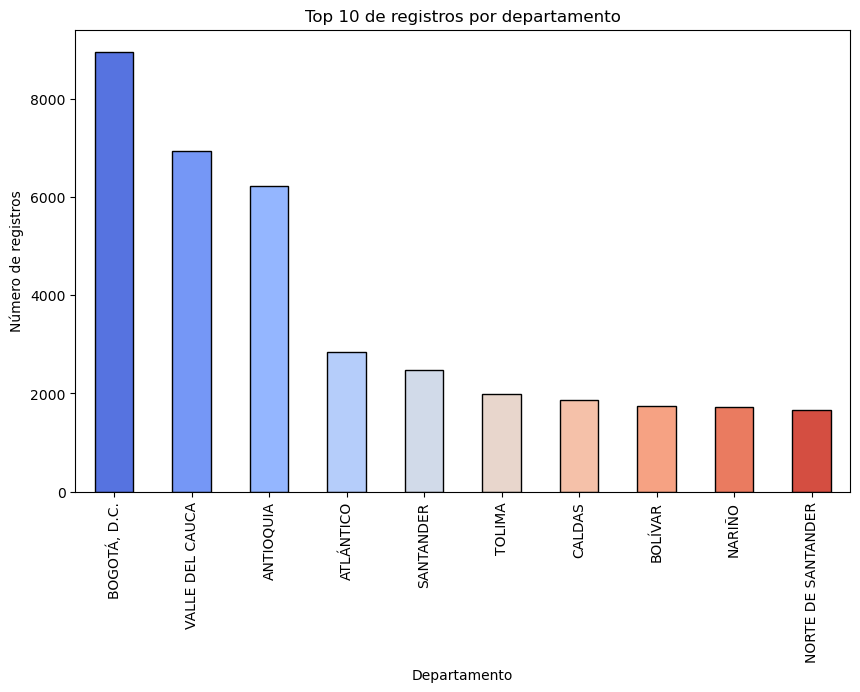

In [71]:
registros_departamento = data16['DEPARTAMENTO'].value_counts().head(10)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(registros_departamento))

registros_departamento.plot(kind = 'bar', color = colors, edgecolor = 'black')
plt.title('Top 10 de registros por departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de registros')
plt.xticks(rotation=90)
plt.show()

Top municipios

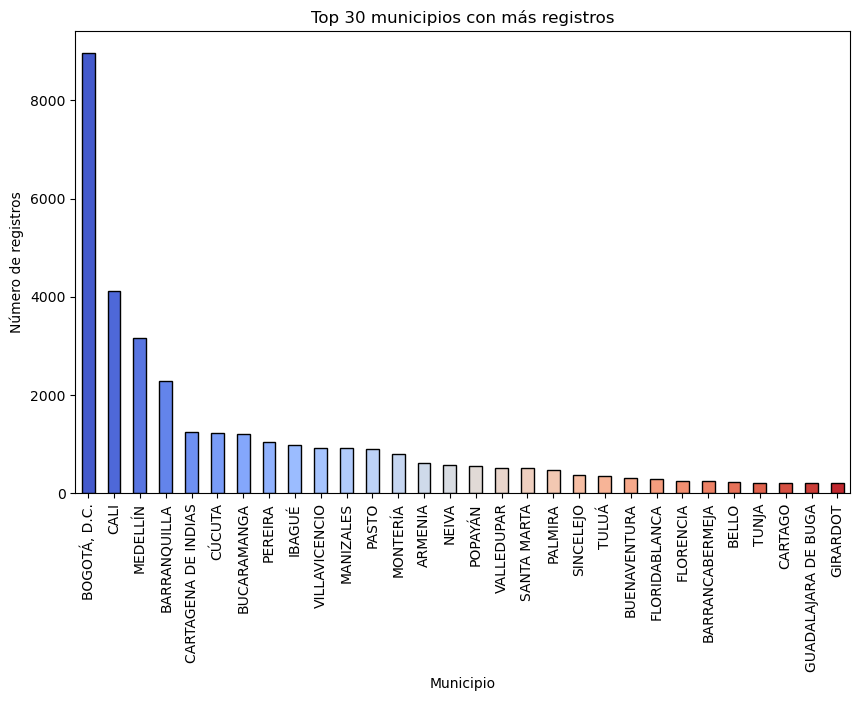

In [56]:
top_municipios = data16['MUNICIPIO'].value_counts().nlargest(30)
plt.figure(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(top_municipios))

top_municipios.plot(kind = 'bar', color = colors, edgecolor = 'black')
plt.title('Top 30 municipios con más registros')
plt.xlabel('Municipio')
plt.ylabel('Número de registros')
plt.xticks(rotation=90)
plt.show()

Casos por año

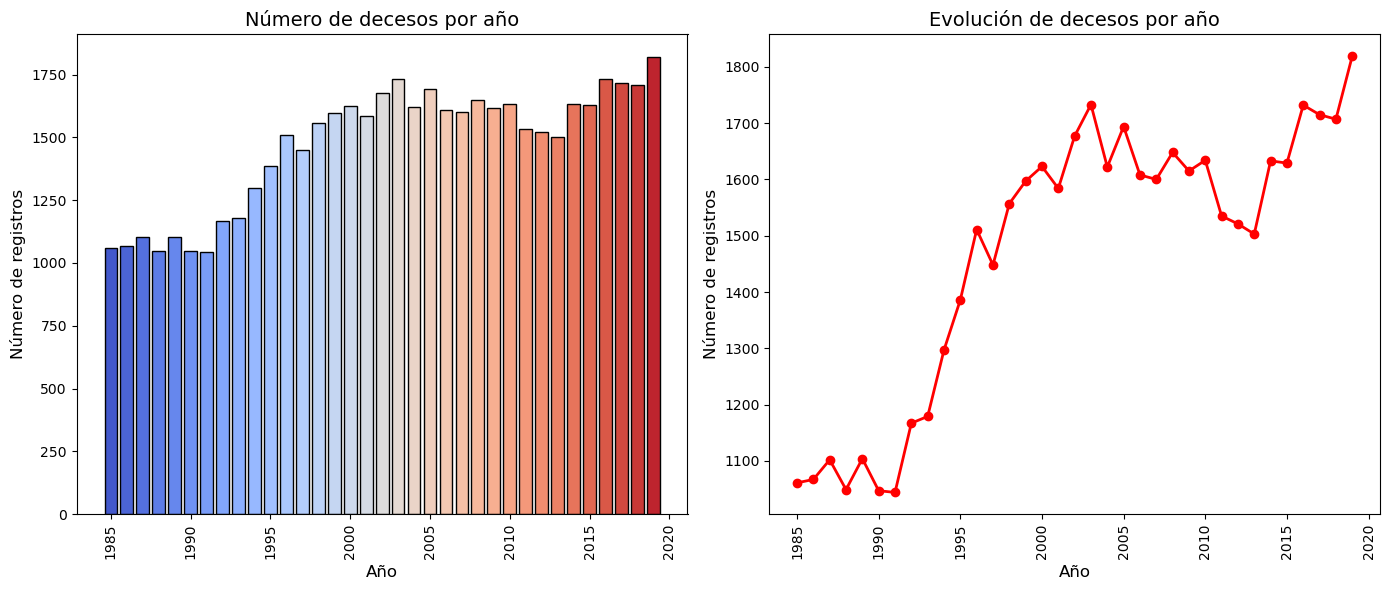

In [64]:
casos_por_año = data16['ANO'].value_counts().sort_index()
colors = sns.color_palette('coolwarm', len(casos_por_año))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Gráfico de barras (izquierda)
axes[0].bar(casos_por_año.index, casos_por_año.values, color=colors, edgecolor='black')
axes[0].set_title('Número de decesos por año', fontsize=14)
axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Número de registros', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Gráfico de líneas (derecha)
axes[1].plot(casos_por_año.index, casos_por_año.values, color='red', marker='o', linestyle='-', linewidth=2)
axes[1].set_title('Evolución de decesos por año', fontsize=14)
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Número de registros', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Ajustar diseño
plt.tight_layout()
plt.show()


In [69]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("Número de decesos por año", "Evolución de decesos por año"))

# Bar chart (left)
fig.add_trace(
    go.Bar(x=casos_por_año.index, y=casos_por_año.values, marker=dict(color=casos_por_año.values, colorscale="Viridis")),
    row=1, col=1
)

# Line chart (right)
fig.add_trace(
    go.Scatter(x=casos_por_año.index, y=casos_por_año.values, mode="lines+markers", line=dict(color="red")),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500, width=1000,
    showlegend=False,
    xaxis=dict(title="Año", tickangle=90),
    xaxis2=dict(title="Año", tickangle=90),
    yaxis=dict(title="Número de registros"),
    yaxis2=dict(title="Número de registros"),
    template="plotly_white"
)

fig.show()